In [2]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
# Charger le fichier CSV contenant les features
csv_file = "features_log.csv"
df = pd.read_csv(csv_file)

# Supprimer les colonnes inutiles si elles existent
columns_to_drop = [col for col in ["timestamp", "gaze", "anomaly"] if col in df.columns]
features = df.drop(columns=columns_to_drop)


In [4]:
model = joblib.load("eye_anomaly_model.pkl")
predictions = model.predict(features)

# Ajouter les résultats au dataframe
df["anomaly"] = predictions
df["anomaly_label"] = df["anomaly"].map({-1: "🚨 Anomalie", 1: "✅ Normal"})

# Sauvegarde
df.to_csv("anomaly_log.csv", index=False)
print("✅ Anomalies détectées et sauvegardées dans 'anomaly_log.csv'.")
anomalies = df[df["anomaly"] == -1]
print(f"\nNombre d’anomalies détectées : {len(anomalies)}")
if "timestamp" in df.columns:
    print(anomalies[["timestamp", "anomaly_label"]])
else:
    print(anomalies[["anomaly_label"]])



✅ Anomalies détectées et sauvegardées dans 'anomaly_log.csv'.

Nombre d’anomalies détectées : 201
                timestamp anomaly_label
1318  2025-07-07 11:46:16    🚨 Anomalie
1319  2025-07-07 11:46:17    🚨 Anomalie
1320  2025-07-07 11:46:17    🚨 Anomalie
1321  2025-07-07 11:46:17    🚨 Anomalie
1322  2025-07-07 11:46:17    🚨 Anomalie
...                   ...           ...
2479  2025-07-07 12:14:47    🚨 Anomalie
2480  2025-07-07 12:14:47    🚨 Anomalie
2481  2025-07-07 12:14:47    🚨 Anomalie
2482  2025-07-07 12:14:47    🚨 Anomalie
2483  2025-07-07 12:14:47    🚨 Anomalie

[201 rows x 2 columns]


C:\Users\21654\AppData\Local\Temp\ipykernel_34504\3816841516.py:16: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\21654\OneDrive - South Mediterranean University\Desktop\EyesTracking\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


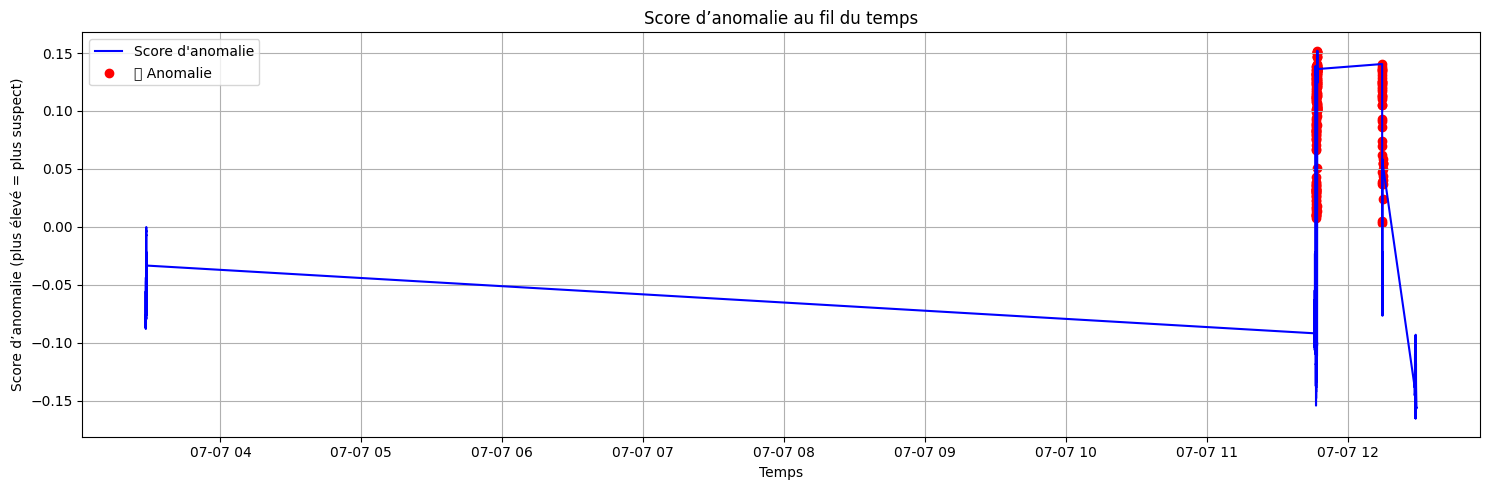

In [5]:
if "timestamp" in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['is_anomaly'] = df['anomaly'] == -1
    scores = model.decision_function(features)
    df["anomaly_score"] = -scores

    plt.figure(figsize=(15, 5))
    plt.plot(df['timestamp'], df['anomaly_score'], label="Score d'anomalie", color='blue')
    plt.scatter(df[df.is_anomaly]['timestamp'], df[df.is_anomaly]['anomaly_score'],
                color='red', label="🚨 Anomalie")
    plt.title("Score d’anomalie au fil du temps")
    plt.xlabel("Temps")
    plt.ylabel("Score d’anomalie (plus élevé = plus suspect)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


PCA


In [6]:
# Préparer les données pour PCA
features = df.drop(columns=[col for col in ["timestamp", "gaze", "anomaly", "anomaly_label", "is_anomaly", "anomaly_score"]
                            if col in df.columns])

labels = df["anomaly"] if "anomaly" in df.columns else None
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA sur 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
if labels is not None:
    pca_df["anomaly"] = labels


C:\Users\21654\AppData\Local\Temp\ipykernel_34504\777609337.py:18: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\21654\AppData\Local\Temp\ipykernel_34504\777609337.py:18: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\21654\OneDrive - South Mediterranean University\Desktop\EyesTracking\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\21654\OneDrive - South Mediterranean University\Desktop\EyesTracking\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


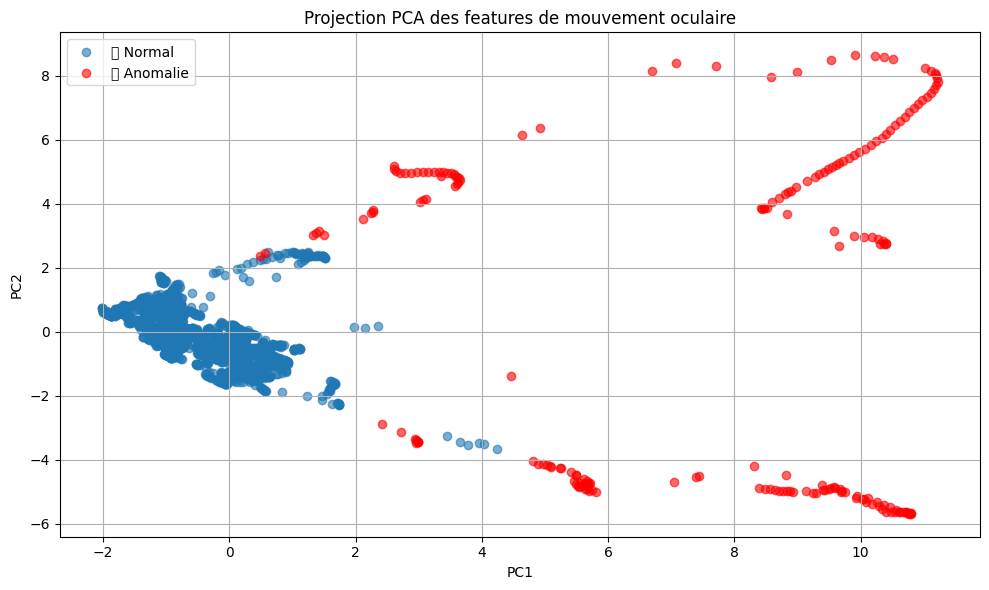

In [7]:
plt.figure(figsize=(10, 6))

if labels is not None:
    plt.scatter(pca_df[pca_df["anomaly"] == 1]["PC1"],
                pca_df[pca_df["anomaly"] == 1]["PC2"],
                label="✅ Normal", alpha=0.6)
    plt.scatter(pca_df[pca_df["anomaly"] == -1]["PC1"],
                pca_df[pca_df["anomaly"] == -1]["PC2"],
                label="🚨 Anomalie", alpha=0.6, color="red")
else:
    plt.scatter(pca_df["PC1"], pca_df["PC2"], label="Données")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection PCA des features de mouvement oculaire")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
